# Image Classification for Dogs and Cats
Author: Qingyuan Zhang, Jiaqi Xiong, Lu Xia, Delilah Huynh

## Install opencv package in anaconda

In [ ]:
!conda install -c https://conda.binstar.org/menpo opencv3

In [27]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
from IPython.display import Image
from IPython.display import IFrame # displaying pdf file in jupyter
from scipy import misc
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn import svm
from sklearn import neighbors
from sklearn import datasets
from sklearn import mixture
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact
from matplotlib import cm
from matplotlib.colors import LogNorm
import os
import cv2
from __future__ import division
from __future__ import print_function
from PIL import Image
from io import StringIO as io
import sys
import os 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

np.set_printoptions(precision=1)

%matplotlib inline

# Image classificaiton 
### Our project is about image classfication. Our dataset contains pictures of cat and dog. We want to find a classification to determine the type of the photo

In [13]:
path = "/Users/Qingyuan/Documents/Simon/MKT436R/python_project/train3/cat.0.jpg"

Read the image with cv2

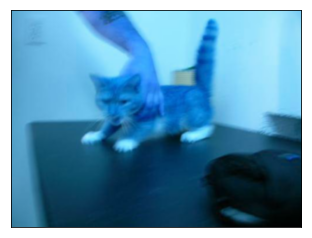

In [14]:
img = cv2.imread(path)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Resize the image

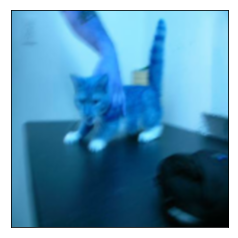

In [15]:
res=cv2.resize(img,(150,150))
plt.imshow(res, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Convert it to black and white

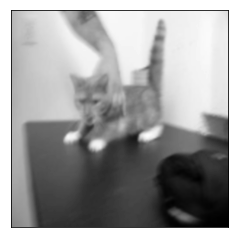

In [16]:
gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Input the data and label the photos 
(To gain a fast speed we only use 2000 images but the result in our report is accuracy for whole 25000 images)

In [29]:
training_set = []
training_labels = []
# should change to your own directory that save the images.
rootdir = '/Users/Qingyuan/Documents/Simon/MKT436R/python_project/train3/'
for filename in os.listdir(rootdir):
    if filename.endswith(".jpg"):
        if filename.startswith("cat"):
            path = "/Users/Qingyuan/Documents/Simon/MKT436R/python_project/train3/"+filename
            img = cv2.imread(path)
            res=cv2.resize(img,(150,150))
            gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
            xarr=np.squeeze(np.array(gray_image).astype(np.float32))
            xarr = xarr.reshape(150*150,)
            training_set.append(xarr)
            target = "0"
            training_labels.append(target)
            
        if filename.startswith("dog"):
            path = "/Users/Qingyuan/Documents/Simon/MKT436R/python_project/train3/"+filename
            img = cv2.imread(path)
            res=cv2.resize(img,(150,150))
            gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
            xarr=np.squeeze(np.array(gray_image).astype(np.float32))
            xarr = xarr.reshape(150*150,)
            training_set.append(xarr)
            target = "1"
            training_labels.append(target)

### Feature extraction

In [40]:
Y = np.int32(training_labels)
n_components = 30
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(training_set)
eigenfaces = pca.components_.reshape((n_components, 150, 150))
X_pca = pca.transform(training_set)

### First try KNN classfication to classify the photos.

In [41]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_pca, Y)
scores = cross_val_score(knn, X_pca, Y, cv=5) # R^2 
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.5  0.5  0.6  0.5  0.5]
Accuracy: 0.55 (+/- 0.02)


In [56]:
results = []
for d in range(1,10):
    knn = neighbors.KNeighborsClassifier(d)
    knn.fit(X_pca, Y)
    scores = cross_val_score(knn, X_pca, Y, cv=5)
    print('neighbors %d, mean %.2f, std %.2f'%(d,scores.mean(),scores.std()),scores)
    results.append((d,scores.mean(), scores.std()))
    
df_knn_accuracy = pd.DataFrame(data=results,columns=['neighbors','mean','std'])
df_knn_accuracy

neighbors 1, mean 0.54, std 0.01 [ 0.6  0.5  0.6  0.5  0.5]
neighbors 2, mean 0.55, std 0.01 [ 0.5  0.5  0.6  0.6  0.5]
neighbors 3, mean 0.54, std 0.02 [ 0.6  0.5  0.6  0.5  0.5]
neighbors 4, mean 0.56, std 0.02 [ 0.6  0.5  0.6  0.6  0.5]
neighbors 5, mean 0.55, std 0.02 [ 0.5  0.5  0.6  0.5  0.5]
neighbors 6, mean 0.56, std 0.02 [ 0.6  0.5  0.6  0.5  0.6]
neighbors 7, mean 0.56, std 0.01 [ 0.6  0.5  0.6  0.5  0.6]
neighbors 8, mean 0.56, std 0.01 [ 0.6  0.5  0.6  0.6  0.6]
neighbors 9, mean 0.56, std 0.01 [ 0.6  0.5  0.6  0.6  0.5]


,neighbors,mean,std
0,1,0.541971,0.007638
1,2,0.547444,0.013089
2,3,0.542947,0.024231
3,4,0.563826,0.021562
4,5,0.550407,0.020629
5,6,0.558369,0.024658
6,7,0.560850,0.012950
7,8,0.562837,0.013902
8,9,0.558366,0.013054


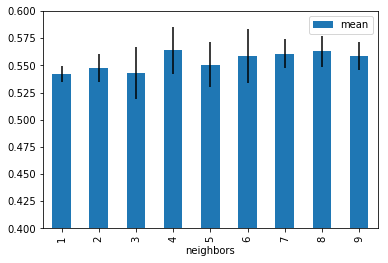

In [51]:
df_knn_accuracy.plot.bar(x='neighbors',y='mean',yerr='std', ylim=[0.4,0.6])

### Use SVM to classfy the photos

In [32]:
SVM = svm.SVC(kernel='linear')#, gamma=0.001)
SVM = SVM.fit(X_pca,Y)
scores = cross_val_score(SVM, X_pca, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.5  0.6  0.6  0.5  0.6]
Accuracy: 0.56 (+/- 0.01)


### Try the rbf SVM and the accuracy increase

In [33]:
SVM = svm.SVC(kernel='rbf')#, gamma=0.001)
SVM = SVM.fit(X_pca,Y)
scores = cross_val_score(SVM, X_pca, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.6  0.6  0.6  0.6  0.6]
Accuracy: 0.61 (+/- 0.02)


### We use grid search to find the parameter in SVM classificaition. The parameter is generated by log function but we don't get a larger result. However, we believe by search for more number, we can find a model with better accuracy.

In [34]:
from sklearn import svm, grid_search
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.01, 0.001, 0.0001], }
clf = grid_search.GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_pca, Y) 
scores = cross_val_score(clf, X_pca, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.6  0.6  0.6  0.6  0.6]
Accuracy: 0.61 (+/- 0.02)


In [62]:
gammas = [0.01, 0.001, 0.0001, 0.00001]
Cs = [1, 10, 100, 1000,10000]
results = []
for c in Cs:
    SVM = svm.SVC(kernel='rbf', C = c)#, gamma=0.001)
    SVM = SVM.fit(X_pca,Y)
    scores = cross_val_score(SVM, X_pca, Y, cv=5)
    print('C %d, mean %.2f, std %.2f'%(c,scores.mean(),scores.std()),scores)
    results.append((c,scores.mean(), scores.std()))
    
df_svm_accuracy1 = pd.DataFrame(data=results,columns=['C','mean','std'])
df_svm_accuracy1

for g in gammas:
    SVM = svm.SVC(kernel='rbf', gamma = g)#, gamma=0.001)
    SVM = SVM.fit(X_pca,Y)
    scores = cross_val_score(SVM, X_pca, Y, cv=5)
    print('gammas %d, mean %.2f, std %.2f'%(g,scores.mean(),scores.std()),scores)
    results.append((g,scores.mean(), scores.std()))
    
df_svm_accuracy2 = pd.DataFrame(data=results,columns=['gammas','mean','std'])


C 1, mean 0.61, std 0.02 [ 0.6  0.6  0.6  0.6  0.6]
C 10, mean 0.60, std 0.03 [ 0.6  0.6  0.6  0.6  0.6]
C 100, mean 0.58, std 0.02 [ 0.6  0.6  0.6  0.6  0.6]
C 1000, mean 0.58, std 0.01 [ 0.6  0.6  0.6  0.6  0.6]
C 10000, mean 0.58, std 0.01 [ 0.6  0.6  0.6  0.6  0.6]
gammas 0, mean 0.58, std 0.01 [ 0.6  0.6  0.6  0.6  0.6]
gammas 0, mean 0.56, std 0.01 [ 0.5  0.6  0.6  0.5  0.6]
gammas 0, mean 0.50, std 0.00 [ 0.5  0.5  0.5  0.5  0.5]
gammas 0, mean 0.50, std 0.00 [ 0.5  0.5  0.5  0.5  0.5]


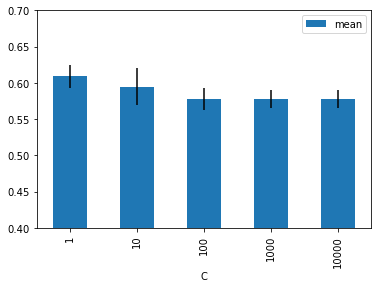

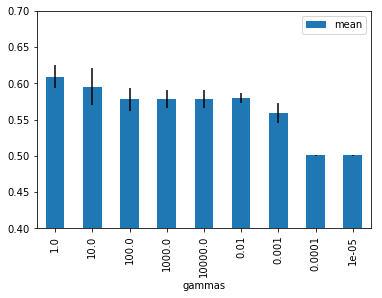

In [63]:
df_svm_accuracy1.plot.bar(x='C',y='mean',yerr='std', ylim=[0.4,0.7])
df_svm_accuracy2.plot.bar(x='gammas',y='mean',yerr='std', ylim=[0.4,0.7])

### Use decision tree with max depth of 5 to classfy the photos

In [66]:
reg = tree.DecisionTreeClassifier(max_depth=5)
reg = reg.fit(X_pca,Y)
scores = cross_val_score(reg, X_pca, Y, cv=5) # R^2 
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.6  0.5  0.5  0.6  0.6]
Accuracy: 0.54 (+/- 0.02)


### Try different depth but accuracy does not change so much

In [67]:
params = [{'max_depth':[1,2,3,4,5,6,7,8]}]
reg = tree.DecisionTreeClassifier(max_depth=1)
reg = reg.fit(X_pca,Y)
clf = grid_search.GridSearchCV(reg, params,
                   n_jobs=-1)
clf = clf.fit(X_pca, Y) 
scores = cross_val_score(clf, X_pca, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.6  0.6  0.5  0.6  0.5]
Accuracy: 0.55 (+/- 0.02)


In [70]:
results = []
for d in range(1,10):
    reg = tree.DecisionTreeClassifier(max_depth=5)
    reg = reg.fit(X_pca,Y)
    scores = cross_val_score(reg, X_pca, Y, cv=5) # R^2 
    print('depth %d, mean %.2f, std %.2f'%(d,scores.mean(),scores.std()),scores)
    results.append((d,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','mean','std'])
df_tree_accuracy

depth 1, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 2, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 3, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 4, mean 0.55, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 5, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 6, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 7, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 8, mean 0.54, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]
depth 9, mean 0.55, std 0.02 [ 0.6  0.5  0.5  0.6  0.6]


,depth,mean,std
0,1,0.543980,0.018629
1,2,0.544481,0.022764
2,3,0.544975,0.021301
3,4,0.545474,0.022258
4,5,0.544975,0.020774
5,6,0.543485,0.020767
6,7,0.544976,0.021904
7,8,0.544975,0.021126
8,9,0.545967,0.019448


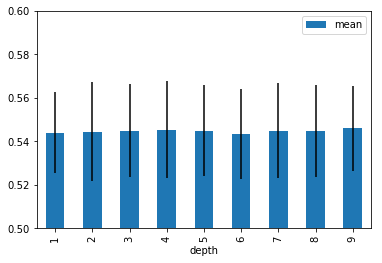

In [72]:
df_tree_accuracy.plot.bar(x='depth',y='mean',yerr='std', ylim=[0.5,0.6])

### Use random forest to do the classfication, even though it show us a high mean accuracy, but high variance make it worse than SVM

In [37]:
clf_rf = RandomForestClassifier(n_estimators= 20, max_depth=3)
clf_rf_scores = cross_val_score(clf_rf, X_pca, Y, cv=5)
print(clf_rf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_rf_scores.mean(), scores.std()))

[ 0.5  0.6  0.6  0.6  0.6]
Accuracy: 0.57 (+/- 0.02)


In [92]:
result = []
n_range = range(1,40,1)
for n in n_range:
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=n)
    clf_rf_scores = cross_val_score(clf_rf, X_pca, Y, cv=5)
    result.append((n,clf_rf_scores.mean(),clf_rf_scores.std()))
    
df_rf_accuracy = pd.DataFrame(data=result,columns=['n','RF accuracy','RF error'])
df_rf_accuracy

,n,RF accuracy,RF error
0,1,0.519123,0.010124
1,2,0.528566,0.004909
2,3,0.523600,0.013028
3,4,0.536515,0.016664
4,5,0.530535,0.026841
5,6,0.534030,0.027781
6,7,0.543455,0.017753
7,8,0.554897,0.012072
8,9,0.546914,0.028966
9,10,0.535522,0.015709


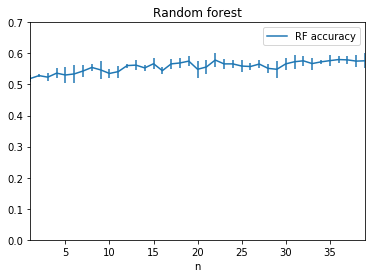

In [93]:
df_rf_accuracy.plot(x='n',y='RF accuracy',ylim=[0,0.7],yerr='RF error',title='Random forest')

### Conduct boosting model

In [100]:
reg = tree.DecisionTreeClassifier(max_depth=1)
reg = reg.fit(X_pca,Y)
reg_boosting = AdaBoostClassifier(base_estimator=reg, learning_rate =0.1)
scores = cross_val_score(reg_boosting, X_pca, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.6  0.6  0.6  0.6  0.6]
Accuracy: 0.58 (+/- 0.02)


In [104]:
result = []
n_range = range(1,40,1)
for n in n_range:
    clf_boost = AdaBoostClassifier(n_estimators=n, learning_rate=0.1)
    clf_boost_scores = cross_val_score(clf_boost, X_pca, Y, cv=5)
    result.append((n,clf_boost_scores.mean(),clf_boost_scores.std()))
    
df_boost_accuracy = pd.DataFrame(data=result,columns=['n','boosting accuracy','boosting error'])
df_boost_accuracy

,n,boosting accuracy,boosting error
0,1,0.529563,0.005975
1,2,0.526585,0.010336
2,3,0.534038,0.014128
3,4,0.534038,0.014128
4,5,0.547951,0.012191
5,6,0.538008,0.016676
6,7,0.541486,0.014929
7,8,0.549433,0.007365
8,9,0.543971,0.014032
9,10,0.544469,0.014096


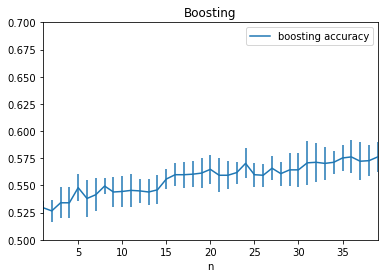

In [107]:
df_boost_accuracy.plot(x='n',y='boosting accuracy',ylim=[0.5,0.7],yerr='boosting error',title='Boosting')

### Unsupervised learning with K-mean clustering

In [109]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_pca) 
print(k_means.labels_)
print(Y)
accuracy= np.mean(k_means.labels_ == Y)
accuracy

[1 1 1 ..., 1 1 0]
[0 0 0 ..., 1 1 1]


0.50521609538002976